In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dt=pd.read_csv("C:/Users/HP/OneDrive/Documents/soil_data (2) (1).csv")
dt.head(10)

,N,P,K,pH,Moisture,Temperature,Recommended Crop,Recommended Fertilizer & Quantity,Predicted Yield
0,23,32,30,5.7,39.8,23.3,Rice,Urea - 50kg/ha,3.93
1,38,47,62,5.6,43.4,27.4,Cotton,Urea - 45kg/ha,3.02
2,30,12,43,6.5,55.0,21.2,Cotton,Potash - 40kg/ha,5.47
3,63,21,50,6.8,44.2,20.3,Wheat,Potash - 40kg/ha,3.08
4,54,28,36,6.0,39.9,29.7,Corn,Potash - 40kg/ha,4.23
5,23,14,40,6.8,58.6,29.5,Corn,Urea - 50kg/ha,3.07
6,37,43,56,5.9,51.7,29.4,Corn,Urea - 50kg/ha,2.66
7,34,42,25,5.9,55.1,25.5,Soybean,DAP - 60kg/ha,5.29
8,74,42,35,6.8,45.3,21.0,Cotton,Urea - 50kg/ha,4.45
9,20,18,51,7.4,40.2,25.0,Cotton,DAP - 60kg/ha,2.77


In [2]:
dt[['Recommended Fertilizer','Quantity']]=dt['Recommended Fertilizer & Quantity'].str.split('-',expand=True)
dt=dt.drop(['Recommended Fertilizer & Quantity'],axis=1)                            # splitting of column

In [3]:
dt

,N,P,K,pH,Moisture,Temperature,Recommended Crop,Predicted Yield,Recommended Fertilizer,Quantity
0,23,32,30,5.7,39.8,23.3,Rice,3.93,Urea,50kg/ha
1,38,47,62,5.6,43.4,27.4,Cotton,3.02,Urea,45kg/ha
2,30,12,43,6.5,55.0,21.2,Cotton,5.47,Potash,40kg/ha
3,63,21,50,6.8,44.2,20.3,Wheat,3.08,Potash,40kg/ha
4,54,28,36,6.0,39.9,29.7,Corn,4.23,Potash,40kg/ha
...,...,...,...,...,...,...,...,...,...,...
494,78,48,63,6.4,59.9,21.2,Soybean,5.45,Urea,45kg/ha
495,72,39,29,7.2,40.4,22.6,Rice,2.86,Potash,40kg/ha
496,57,37,39,7.2,49.1,23.7,Corn,3.11,Urea,45kg/ha
497,75,14,66,6.6,55.2,28.7,Rice,3.05,DAP,60kg/ha


Extracting values from the column quantity

In [5]:
dt['Quantity'] = dt['Quantity'].str.extract(r'(\d+)').astype('int64')   # Extracting values from quantity column

In [6]:
dt

,N,P,K,pH,Moisture,Temperature,Recommended Crop,Predicted Yield,Recommended Fertilizer,Quantity
0,23,32,30,5.7,39.8,23.3,Rice,3.93,Urea,50
1,38,47,62,5.6,43.4,27.4,Cotton,3.02,Urea,45
2,30,12,43,6.5,55.0,21.2,Cotton,5.47,Potash,40
3,63,21,50,6.8,44.2,20.3,Wheat,3.08,Potash,40
4,54,28,36,6.0,39.9,29.7,Corn,4.23,Potash,40
...,...,...,...,...,...,...,...,...,...,...
494,78,48,63,6.4,59.9,21.2,Soybean,5.45,Urea,45
495,72,39,29,7.2,40.4,22.6,Rice,2.86,Potash,40
496,57,37,39,7.2,49.1,23.7,Corn,3.11,Urea,45
497,75,14,66,6.6,55.2,28.7,Rice,3.05,DAP,60


In [7]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   N                       499 non-null    int64  
 1   P                       499 non-null    int64  
 2   K                       499 non-null    int64  
 3   pH                      499 non-null    float64
 4   Moisture                499 non-null    float64
 5   Temperature             499 non-null    float64
 6   Recommended Crop        499 non-null    object 
 7   Predicted Yield         499 non-null    float64
 8   Recommended Fertilizer  499 non-null    object 
 9   Quantity                499 non-null    int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 39.1+ KB


GRADIENT BOOST

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_squared_error, r2_score, confusion_matrix

X=dt[['N','P','K','pH','Moisture','Temperature']]

Classifier

In [11]:
gbc=GradientBoostingClassifier(n_estimators=200, learning_rate=0.025, max_depth=1)

In [12]:
y2=dt['Recommended Fertilizer']
X2_train,X2_test,y2_train,y2_test=train_test_split(X, y2, test_size=0.3, random_state=42)

In [13]:
gbc.fit(X2_train,y2_train)

GradientBoostingClassifier(learning_rate=0.025, max_depth=1, n_estimators=200)

In [14]:
pred2=gbc.predict(X2_test)

In [15]:
gbc.score(X2_train,y2_train)

0.5329512893982808

In [16]:
gbc.score(X2_test,y2_test)

0.48

In [17]:
print(classification_report(y2_test, pred2))

              precision    recall  f1-score   support

        DAP        0.45      0.68      0.55        57
     Potash        0.50      0.05      0.09        39
       Urea        0.52      0.57      0.54        54

    accuracy                           0.48       150
   macro avg       0.49      0.44      0.39       150
weighted avg       0.49      0.48      0.43       150



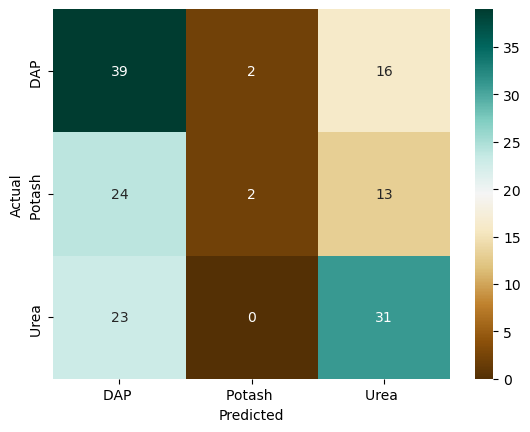

In [18]:
sns.heatmap(confusion_matrix(y2_test, pred2), annot=True, xticklabels=gbc.classes_ ,yticklabels=gbc.classes_ , cmap='BrBG')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [19]:
print('Positively predicted =',np.trace(confusion_matrix(y2_test, pred2)),'out of 150')

Positively predicted = 72 out of 150


SVM for classification

In [21]:
from sklearn.preprocessing import OrdinalEncoder

OE=OrdinalEncoder()
dt['Crop_code']=OE.fit_transform(dt[['Recommended Crop']])
dt['Fertiliser_code']=OE.fit_transform(dt[['Recommended Fertilizer']])
X5=dt[['N','P','pH','Temperature']]
y5=dt['Crop_code']
X5_train, X5_test, y5_train, y5_test=train_test_split(X5, y5, test_size=0.3, random_state=42)

In [126]:
from sklearn.svm import SVC

svm=SVC(kernel='poly' ,C=7, degree=2)
svm.fit(X5_train, y5_train)

SVC(C=7, degree=2, kernel='poly')

In [128]:
pred9=svm.predict(X5_test)

In [130]:
svm.score(X5_train, y5_train)

0.30659025787965616

In [132]:
svm.score(X5_test,y5_test)

0.2866666666666667

In [134]:
print(classification_report(y5_test, pred9))

              precision    recall  f1-score   support

         0.0       0.17      0.04      0.07        23
         1.0       0.34      0.30      0.32        33
         2.0       0.27      0.69      0.38        35
         3.0       0.00      0.00      0.00        33
         4.0       0.32      0.31      0.31        26

    accuracy                           0.29       150
   macro avg       0.22      0.27      0.22       150
weighted avg       0.22      0.29      0.23       150



C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


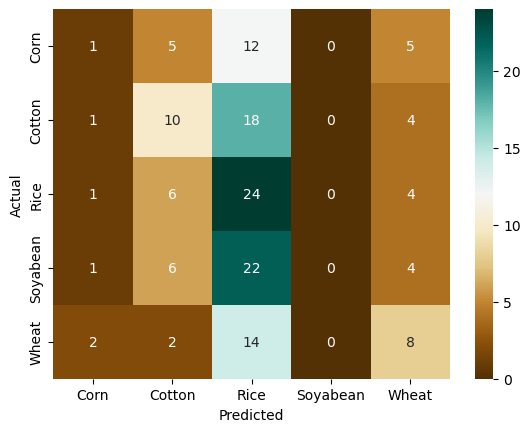

In [136]:
sns.heatmap(confusion_matrix(y5_test, pred9), annot=True, xticklabels=['Corn','Cotton','Rice','Soyabean','Wheat'],yticklabels=['Corn','Cotton','Rice','Soyabean','Wheat'],cmap='BrBG')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [138]:
print('Positively predicted =',np.trace(confusion_matrix(y5_test, pred9)),'out of 150')

Positively predicted = 43 out of 150


RANDOM FOREST for regression 

In [30]:
from sklearn.ensemble import RandomForestRegressor
rfg=RandomForestRegressor(n_estimators=200, min_samples_split=2, max_depth=2)
y8=dt['Quantity']
X8_train, X8_test, y8_train, y8_test=train_test_split(X, y8, test_size=0.3, random_state=42)
rfg.fit(X8_train,y8_train)

RandomForestRegressor(max_depth=2, n_estimators=200)

In [31]:
rfg.score(X8_train,y8_train)

0.09165885593601286

In [32]:
pred12=rfg.predict(X8_test)

In [33]:
rfg.score(X8_test,y8_test)

-0.030297431481052683

In [34]:
mean_squared_error(pred12, y8_test)

58.77732369107019

In [35]:
r2_score(y8_test, pred12)

-0.030297431481052683

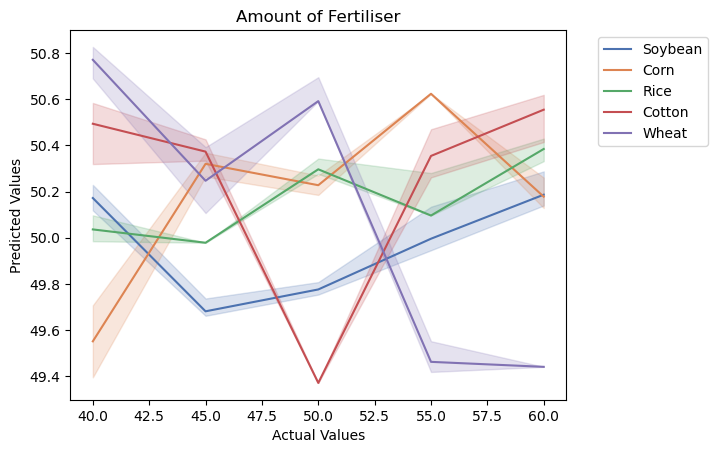

In [36]:
y1=dt['Recommended Crop']
X1_train,X1_test,y1_train,y1_test=train_test_split(X, y1, test_size=0.3, random_state=42)
temp=X1_test.join(y1_test)         # joining testing data to use its recommended crop column as hue
sns.lineplot(data=temp,x=y8_test, y=pred12, hue='Recommended Crop', palette='deep', errorbar=('ci',20))
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title('Amount of Fertiliser')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

LIGHTGBM

Regression

In [39]:
import lightgbm
lgbr=lightgbm.LGBMRegressor(n_estimators=300, learning_rate=0.05, min_data_in_leaf=50, lambda_l1=10, max_depth=5)

In [40]:
y7=dt['Predicted Yield']
X7_train, X7_test, y7_train, y7_test=train_test_split(X, y7, test_size=0.3, random_state=42)

In [41]:
lgbr.fit(X7_train,y7_train)

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 347
[LightGBM] [Info] Number of data points in the train set: 349, number of used features: 6
[LightGBM] [Info] Start training from score 4.193782
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

LGBMRegressor(lambda_l1=10, learning_rate=0.05, max_depth=5,
              min_data_in_leaf=50, n_estimators=300)

In [42]:
lgbr.score(X7_train,y7_train)

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10


0.09104983476091422

In [43]:
pred15=lgbr.predict(X7_test)

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10


In [44]:
lgbr.score(X7_test,y7_test)

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10


0.00021738117817982072

In [45]:
mean_squared_error(pred15,y7_test)

1.074922530156778

In [46]:
r2_score(y7_test, pred15)

0.00021738117817982072

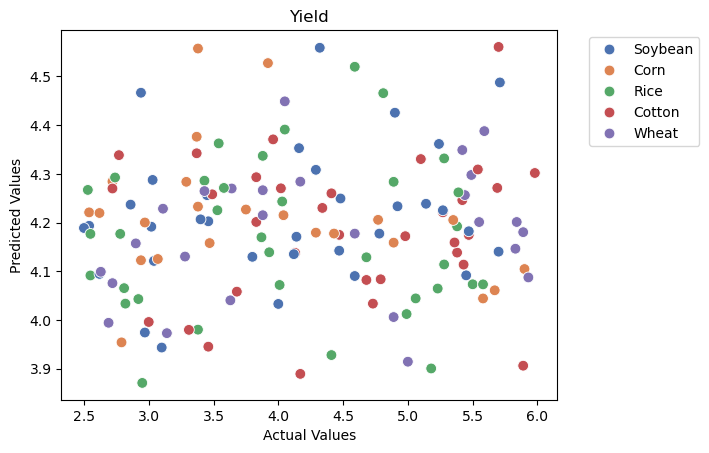

In [47]:
sns.scatterplot(data=temp,x=y7_test, y=pred15, hue='Recommended Crop', palette='deep', s=60)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title('Yield')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()